In [ ]:
#execute this cell, then press 'Restart and clear cell outputs' and execute all cells except this
!pip install -U tensorflow==2.12.0rc0
!pip install -U numpy==1.18.5
!pip install laser_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.8/585.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully un

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install contractions
!pip install vaderSentiment
!pip install sweetviz
!pip install textblob

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import contractions
import sweetviz as sv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import time

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 22.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Datasets

## Direct Search Posts

In [ ]:
reddit_direct_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditDirectPosts_analyzed - RedditDirectPosts_analyzed.csv'

reddit_direct_posts = pd.read_csv(reddit_direct_posts_dir)
reddit_direct_posts = reddit_direct_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_direct_posts.shape)

(5089, 5)


In [ ]:
reddit_direct_posts.head()

,content,relevance,RELEVANCE,Checked,Manual Evaluation
0,"html, css and js to react. Hello everyone, I'm...",73764.52.00,0.0,1,0
1,I can only take 7 lives of heracles. What shou...,167654.45.00,0.0,1,0
2,Creating a Shuttle Bus Service in Rural Area N...,160543.49.00,1.0,1,0
3,"http request Event and Standby. Hello,\n\nI wo...",156304.31.00,1.0,1,0
4,/boot/config-$(uname-r). “/boot/config-$(unam...,162374.48.00,1.0,1,0


In [ ]:
reddit_direct_posts_checked = reddit_direct_posts[reddit_direct_posts.Checked == 1]
reddit_direct_posts_unchecked = reddit_direct_posts[reddit_direct_posts.Checked == 0]

## Filtered Search

In [ ]:
reddit_filtered_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditFilteredPosts_analyzed - RedditFilteredPosts_analyzed.csv'

reddit_filtered_posts = pd.read_csv(reddit_filtered_posts_dir)
reddit_filtered_posts = reddit_filtered_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_filtered_posts.shape)

(1292, 11)


In [ ]:
reddit_filtered_posts_checked = reddit_filtered_posts[reddit_filtered_posts.Checked == 1]
reddit_filtered_posts_unchecked = reddit_filtered_posts[reddit_filtered_posts.Checked == 0]

# Mix Search

In [ ]:
reddit_global_results_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/GlobalResults.csv'

reddit_global_res_posts = pd.read_csv(reddit_global_results_dir)
reddit_global_res_posts = reddit_global_res_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_global_res_posts.columns)

Index(['full_text', 'Checked', 'Manual Evaluation',
       'relvance unbalanced model', 'RELEVANCE _ UNBALANCED MODEL',
       'relvance balanced model', 'RELEVANCE _ BALANCED MODEL', 'relevance',
       'RELEVANCE NIST MODEL', 'Related'],
      dtype='object')


In [ ]:
reddit_global_res_posts.head()

,full_text,Checked,Manual Evaluation,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,relvance balanced model,RELEVANCE _ BALANCED MODEL,relevance,RELEVANCE NIST MODEL,Related
0,How to create a folder of games onto Dock? New...,1,0,605222.55.00,0.0,273471.36.00,0.0,138651.46.00,1.0,0
1,Never seen something like this; VM is refreshi...,1,1,879809.06.00,0.0,871218.03.00,0.0,162825.09.00,1.0,0
2,Kani: A Lightweight Highly Hackable Open-Sourc...,1,0,30974.32.00,0.0,146798.51.00,0.0,146445.49.00,1.0,0
3,Best self-publishing options *without* distrib...,1,0,394948.22.00,0.0,279890.17.00,0.0,142301.05.00,1.0,0
4,EA devs need to learn persistence. It’s good t...,1,0,400751.38.00,0.0,27927.45.00,0.0,220768.27.00,0.0,0


In [ ]:
reddit_global_posts_checked = reddit_global_res_posts[reddit_global_res_posts.Checked == 1]
reddit_global_posts_unchecked = reddit_global_res_posts[reddit_global_res_posts.Checked == 0]

In [ ]:
reddit_global_posts_checked.rename(columns={'full_text' : 'content'}, inplace=True)
reddit_global_posts_unchecked.rename(columns={'full_text' : 'content'}, inplace=True)
reddit_global_posts_unchecked.head()
reddit_global_posts_checked.head()

<ipython-input-16-453b93877dac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_global_posts_checked.rename(columns={'full_text' : 'content'}, inplace=True)
<ipython-input-16-453b93877dac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_global_posts_unchecked.rename(columns={'full_text' : 'content'}, inplace=True)


,content,Checked,Manual Evaluation,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,relvance balanced model,RELEVANCE _ BALANCED MODEL,relevance,RELEVANCE NIST MODEL,Related
0,How to create a folder of games onto Dock? New...,1,0,605222.55.00,0.0,273471.36.00,0.0,138651.46.00,1.0,0
1,Never seen something like this; VM is refreshi...,1,1,879809.06.00,0.0,871218.03.00,0.0,162825.09.00,1.0,0
2,Kani: A Lightweight Highly Hackable Open-Sourc...,1,0,30974.32.00,0.0,146798.51.00,0.0,146445.49.00,1.0,0
3,Best self-publishing options *without* distrib...,1,0,394948.22.00,0.0,279890.17.00,0.0,142301.05.00,1.0,0
4,EA devs need to learn persistence. It’s good t...,1,0,400751.38.00,0.0,27927.45.00,0.0,220768.27.00,0.0,0


## Team Analysis

In [ ]:
pip install gspread pandas oauth2client


In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
reddit_posts3 = 'https://docs.google.com/spreadsheets/d/1JkmcuuKJsipjHyK9HDJ64xbGE-zIz2rB7KyloeSvnuI/edit#gid=2102769814'
reddit_posts2 = 'https://docs.google.com/spreadsheets/d/1NiJYJoIgAeKkYuGY338MtMmuSdjlsgisT_zDA8b_WKc/edit#gid=884260924'
reddit_posts1 = 'https://docs.google.com/spreadsheets/d/14bc3_VPW0I8Pcf40ZF78BcHI1AoAZ3nhdZdqRnNvBEY/edit#gid=1305219599'
reddit_posts4 = 'https://docs.google.com/spreadsheets/d/1hQOwgRf7jIWLmvksr1v_BmdwOJap1PrKoSmrs5-HS78/edit#gid=416251711'
reddit_posts5 = 'https://docs.google.com/spreadsheets/d/1wuUscml8_YykP1dC802BpcBMD2nGFxHTywaWDCTh0Tk/edit#gid=787134330'
reddit_posts6 = 'https://docs.google.com/spreadsheets/d/1BlDYry6Q2VueejyuUn7kncRJmPmrqKgYKO9yO_ZQtfU/edit#gid=773392604'
reddit_posts7 = 'https://docs.google.com/spreadsheets/d/1OZ9tqkb_dnl69SRbLfcifmqxuIf415drkeuDqYNUg9o/edit#gid=1806656778'
reddit_posts8 = 'https://docs.google.com/spreadsheets/d/1iaftVk5DqCsUF93712hVJke3OL_1WTziaIlDPwaaTBs/edit#gid=422591794'

In [ ]:
import os

current_directory = os.getcwd()
print(current_directory)

/content


In [ ]:
nuovi_nomi_colonne = ['content', 'keyword', 'keyword type', 'Checked', 'Manual Evaluation']


In [ ]:
from google.auth import default
creds, _ = default()

gs = gspread.authorize(creds)

# WORKSHEET 1

worksheet1 = gs.open_by_url(reddit_posts1).sheet1

rows1 = worksheet1.get_all_values()

df1 = pd.DataFrame(rows1)
df1 = df1.iloc[1:, 1:]
df1.columns = nuovi_nomi_colonne

# WORKSHEET 2

worksheet2 = gs.open_by_url(reddit_posts2).sheet1

rows2 = worksheet2.get_all_values()

df2 = pd.DataFrame(rows2)
df2 = df2.iloc[1:, 1:]
df2.columns = nuovi_nomi_colonne

# WORKSHEET 3

worksheet3 = gs.open_by_url(reddit_posts3).sheet1

rows3 = worksheet3.get_all_values()

df3 = pd.DataFrame(rows3)
df3 = df3.iloc[1:, 1:]
df3.columns = nuovi_nomi_colonne

# WORKSHEET 4

worksheet4 = gs.open_by_url(reddit_posts4).sheet1

rows4 = worksheet4.get_all_values()

df4 = pd.DataFrame(rows4)
df4 = df4.iloc[1:, 1:]
df4.columns = nuovi_nomi_colonne

# WORKSHEET 5

worksheet5 = gs.open_by_url(reddit_posts5).sheet1

rows5 = worksheet5.get_all_values()

df5 = pd.DataFrame(rows5)
df5 = df5.iloc[1:, 1:]
df5.columns = nuovi_nomi_colonne

# WORKSHEET 6

worksheet6 = gs.open_by_url(reddit_posts6).sheet1

rows6 = worksheet6.get_all_values()

df6 = pd.DataFrame(rows6)
df6 = df6.iloc[1:, 1:]
df6.columns = nuovi_nomi_colonne

# WORKSHEET 7

worksheet7 = gs.open_by_url(reddit_posts7).sheet1

rows7 = worksheet7.get_all_values()

df7 = pd.DataFrame(rows5)
df7 = df7.iloc[1:, 1:]
df7.columns = nuovi_nomi_colonne

# WORKSHEET 8

worksheet8 = gs.open_by_url(reddit_posts8).sheet1

rows8 = worksheet8.get_all_values()

df8 = pd.DataFrame(rows8)
df8 = df8.iloc[1:, 1:]
df8.columns = nuovi_nomi_colonne

df_reddit_collection = pd.concat([df3, df8, df7, df6, df5, df4, df2, df1 ]).reset_index(drop=True)

df_reddit_collection

                                                content          keyword  \
1     Download backups for local edit. Hey,\n\nTryin...       downloader   
2     Deco m9 Blinking red when switched from router...     network http   
3     openCV can't find image when inside a folder. ...     Start Folder   
4     Anyone here use Pydroid?. I'm having trouble r...       downloader   
5     Can someone just give me every internet help t...       downloader   
...                                                 ...              ...   
4493  Choosing between cloud company vs hospital?. I...  creates service   
4494  PyBroker - Algotrading in Python with Machine ...       downloader   
4495  Apparent minor network differences after switc...       downloader   
4496  Windows Update Errors and Corrupted Files. PC:...       downloader   
4497  Cheap Homelab Server Build?. Hey guys,\n\nAs t...    document open   

      keyword type Checked Manual Evaluation  
1        behaviour       1              

,content,keyword,keyword type,Checked,Manual Evaluation
0,NPS Server Windows Server 2019 on wired networ...,creates service,behaviour,1,0
1,How a fake Devil May Cry file (nearly) infecte...,downloader,malware type,1,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",network http post,behaviour,1,0
3,Get URLs to redirect automatically - URL Short...,https urls,behaviour,1,0
4,"Just got this, what do you think, legit?. Subj...",locates browser,behaviour,1,0
...,...,...,...,...,...
39377,Choosing between cloud company vs hospital?. I...,creates service,behaviour,0,0
39378,PyBroker - Algotrading in Python with Machine ...,downloader,behaviour,0,0
39379,Apparent minor network differences after switc...,downloader,malware type,0,0
39380,Windows Update Errors and Corrupted Files. PC:...,downloader,malware type,0,0


In [ ]:
df_reddit_collection['Checked'] = pd.to_numeric(df_reddit_collection['Checked'], errors='coerce')
df_reddit_collection['Manual Evaluation'] = pd.to_numeric(df_reddit_collection['Manual Evaluation'], errors='coerce')
df_reddit_collection['Checked'] = df_reddit_collection['Checked'].fillna(0).astype('int64')
df_reddit_collection['Manual Evaluation'] = df_reddit_collection['Manual Evaluation'].fillna(0).astype('int64')

In [ ]:
df_checked_reddit_collection = df_reddit_collection [df_reddit_collection['Checked'] == 1]
df_unchecked_reddit_collection = df_reddit_collection[df_reddit_collection['Checked'] == 0]

print(f'Checked : {len(df_checked_reddit_collection)}')
print(f'Unchecked : {len(df_unchecked_reddit_collection)}')
print(f'Total : {len(df_unchecked_reddit_collection) + len(df_checked_reddit_collection)}')


Checked : 7782
Unchecked : 31600
Total : 39382


# Union


In [ ]:
reddit_posts_checked = pd.concat([ df_checked_reddit_collection[['content', 'Manual Evaluation']], reddit_filtered_posts_checked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_checked[[ 'content', 'Manual Evaluation' ]], reddit_global_posts_checked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_checked.head()

,content,Manual Evaluation
0,NPS Server Windows Server 2019 on wired networ...,0
1,How a fake Devil May Cry file (nearly) infecte...,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0
3,Get URLs to redirect automatically - URL Short...,0
4,"Just got this, what do you think, legit?. Subj...",0


In [ ]:
reddit_posts_unchecked = pd.concat([df_unchecked_reddit_collection[['content', 'Manual Evaluation']], reddit_filtered_posts_unchecked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_unchecked[[ 'content', 'Manual Evaluation' ]], reddit_global_posts_unchecked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_unchecked.head()

,content,Manual Evaluation
3849,AlloyDB and DBT for PostgreSQL! Where does thi...,0
3850,Twrp cant see update file. Hi ive recently ins...,0
3851,Netgate 2100 - PFSense + Individual Network In...,0
3852,Noob that needs help with StS VPN - Can ping g...,0
3853,I want to run an Instagram account without my ...,0


In [ ]:
reddit_posts_checked.rename(columns={  'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)
reddit_posts_unchecked.rename(columns={'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)

In [ ]:
reddit_posts_checked = reddit_posts_checked.drop_duplicates().reset_index(drop = True)
reddit_posts_checked

,full_text,Related
0,NPS Server Windows Server 2019 on wired networ...,0
1,How a fake Devil May Cry file (nearly) infecte...,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0
3,Get URLs to redirect automatically - URL Short...,0
4,"Just got this, what do you think, legit?. Subj...",0
...,...,...
10154,"Any way to disable ""Handsfree Telephony"" servi...",0
10155,Are self-driving cars already safer than human...,0
10156,Question about setting up a Corinna class insi...,0
10157,20230626: US troops deployed in Peru for joint...,0


In [ ]:
reddit_posts_unchecked = reddit_posts_unchecked.drop_duplicates().reset_index(drop = True)
reddit_posts_unchecked

,full_text,Related
0,AlloyDB and DBT for PostgreSQL! Where does thi...,0
1,Twrp cant see update file. Hi ive recently ins...,0
2,Netgate 2100 - PFSense + Individual Network In...,0
3,Noob that needs help with StS VPN - Can ping g...,0
4,I want to run an Instagram account without my ...,0
...,...,...
27235,ReconAfrica Annual General Meeting - Inaugural...,0
27236,Cannot find cause of blocked network traffic. ...,0
27237,Cant open gta 5 or any rockstar title or even ...,0
27238,What's something you learned after years of be...,0


tokenize + embeddings

In [ ]:
# pip install --upgrade tensorflow

In [ ]:
!pip install keras-tuner
!pip install --upgrade paramiko cryptography


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 12.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import os
import json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn import preprocessing

import nltk # NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

#Tuner
from keras_tuner.tuners import RandomSearch


In [ ]:
# seed initialization
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
df = pd.concat([reddit_posts_checked])
df = df.drop_duplicates(subset=['full_text']).reset_index(drop = True)
(df.head())

,full_text,Related
0,NPS Server Windows Server 2019 on wired networ...,0
1,How a fake Devil May Cry file (nearly) infecte...,1
2,"Routing/Loop Issue, Need Help. I have a Netgea...",0
3,Get URLs to redirect automatically - URL Short...,0
4,"Just got this, what do you think, legit?. Subj...",0


<Axes: title={'center': 'Percentage of Labels'}, ylabel='Related'>

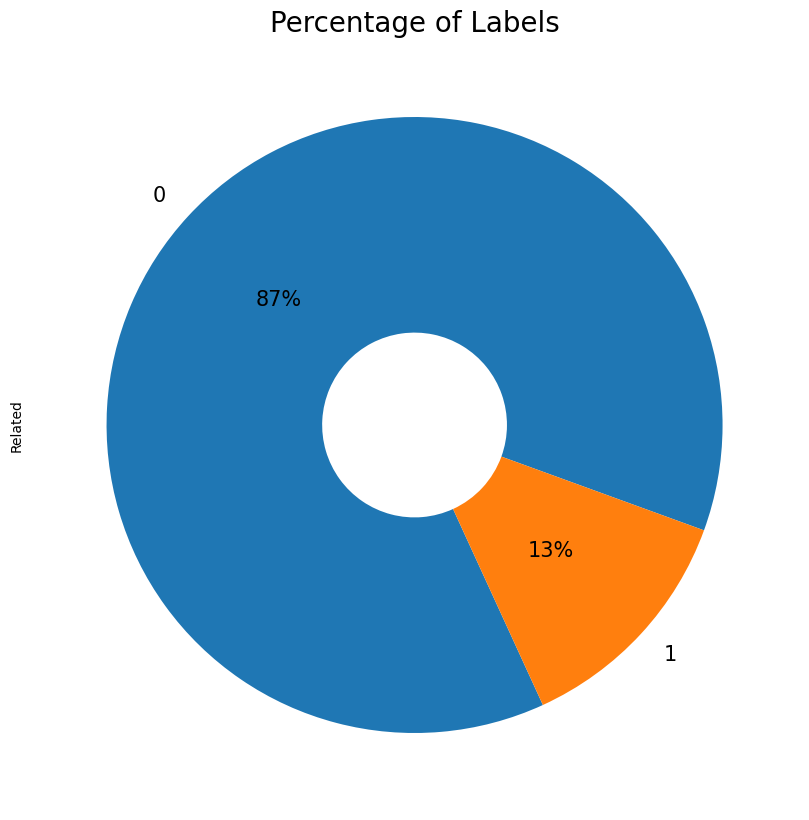

In [ ]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
df.Related.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [ ]:
# make it balanced

value_counts = df['Related'].value_counts()

min_occurrences = value_counts.min()

df_balanced = pd.concat([df[df['Related'] == value].sample(min_occurrences) for value in value_counts.index])


In [ ]:
value_counts_balanced = df_balanced['Related'].value_counts()
value_counts_balanced

0    1274
1    1274
Name: Related, dtype: int64

In [ ]:
value_counts

0    8834
1    1274
Name: Related, dtype: int64

<Axes: title={'center': 'Percentage of Labels'}, ylabel='Related'>

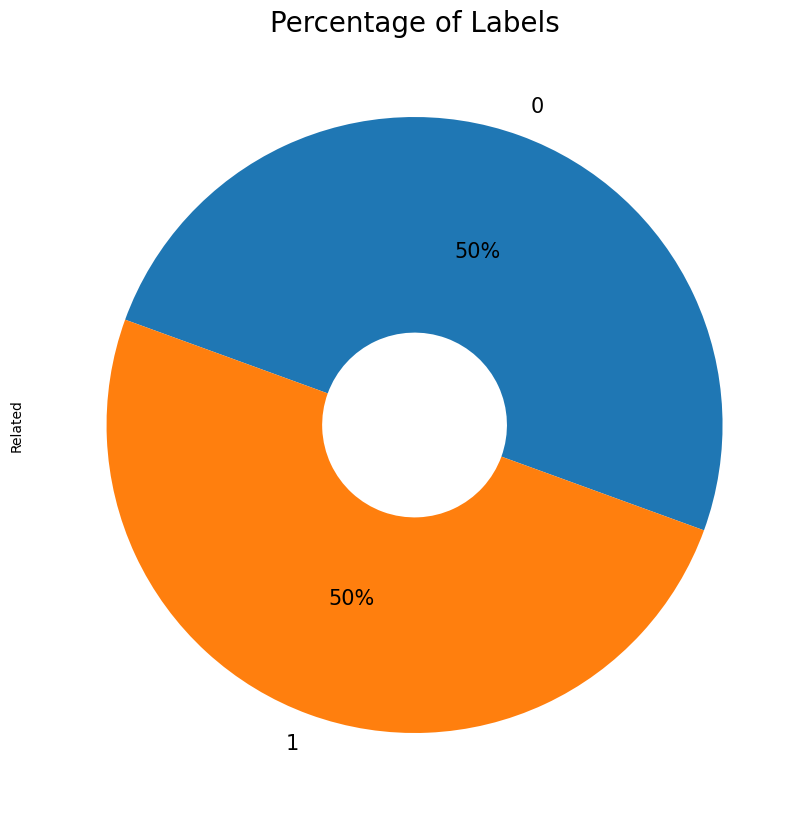

In [ ]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
df_balanced.Related.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

## PREPROCESSING
#### Remove links and punctuation

In [ ]:
import re

def preprocessing(text):

    text = re.sub(r'http\S+', ' ', text)

    return text

text = "Hey, this is a link: https://www.example.com !?"
new_text = preprocessing(text)

new_text

'Hey  this link     '

In [ ]:
df_balanced['original_text'] = df_balanced['full_text']

df_balanced['full_text'] = df_balanced['full_text'].apply(preprocessing)
df_balanced['full_text']

4540    I created a one liner QnA over docs bot with L...
6622    Analyzing email attachments  best way to pull ...
2706    As a drummer  I d love an open source web app ...
604     why is installing specific versions of softwar...
9074    Glenn fiddler  the true villain of side order ...
                              ...                        
5907    Phishing Email got me  So   I clicked a link f...
7468    YYZA file extension  how to rename or remove Y...
5024    I had a virus called AndroidOS ZkarletFlash an...
2502    Am I in trouble   Didn t notice ar first but I...
2986    VMware Response to CVE 2023 29552   Reflective...
Name: full_text, Length: 2548, dtype: object

In [ ]:
df['original_text'] = df['full_text']

df['full_text'] = df['full_text'].apply(preprocessing)
df['full_text']

0        NPS Server Windows Server 2019 on wired networ...
1        How a fake Devil May Cry file  nearly  infecte...
2        Routing Loop Issue  Need Help  I have a Netgea...
3        Get URLs to redirect automatically   URL Short...
4        Just got this  what do you think  legit   Subj...
                               ...                        
10103    Any way to disable  Handsfree Telephony  servi...
10104    Are self driving cars already safer than human...
10105    Question about setting up a Corinna class insi...
10106    20230626  US troops deployed in Peru for joint...
10107    Do you need morning processing time   My husba...
Name: full_text, Length: 10108, dtype: object

LASER

In [ ]:
!pip install torch==2.1.0

In [ ]:
#!pip install -q laserembeddings==1.1.2
!pip install -q ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.8/859.8 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 852.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 25.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires t

In [ ]:
!pip install fastcache
# import fasttext
import ftfy
import html
import laserembeddings
import sys

from fastcache import clru_cache
#from laserembeddings import Laser
from typing import List, Union
from urllib.parse import unquote
from laser_encoders import LaserEncoderPipeline


  Preparing metadata (setup.py) ... done
  Created wheel for fastcache: filename=fastcache-1.1.0-cp310-cp310-linux_x86_64.whl size=42958 sha256=822e69ac86353c5d693edae9d8cfbab3925ddd0ccb14f5140bbe00d0284e6feb
  Stored in directory: /root/.cache/pip/wheels/f5/ea/fc/eebb4e5d80ccd0da9db419de1e9b156c9c2875b5d394727aff
Successfully built fastcache


****LASER Encoders****

laser_encoders is the official Python package for the Facebook LASER library. It provides a simple and convenient way to use LASER embeddings in Python. It allows you to calculate multilingual sentence embeddings using the LASER toolkit. These embeddings can be utilized for various natural language processing tasks, including document classification, bitext filtering, and mining.

This encodes each of the strings as a LASER embedding (1024 dimentional vector)

For users familiar with the earlier version of LASER, you might have encountered the laserembeddings package. This package primarily dealt with LASER-1 model embeddings.

For the latest LASER-2,3 models, use the newly introduced laser_encoders package, which offers better performance and support for a wider range of languages.


In [ ]:
# Initialize the LASER encoder pipeline
encoder = LaserEncoderPipeline(lang="igbo")

# Encode sentences into embeddings
embeddings = encoder.encode_sentences(["nnọọ, kedu ka ị mere"])
# If you want the output embeddings to be L2-normalized, set normalize_embeddings to True
normalized_embeddings = encoder.encode_sentences(["nnọọ, kedu ka ị mere"], normalize_embeddings=True)

print(embeddings)
print('\n')
print(normalized_embeddings)

NameError: name 'LaserEncoderPipeline' is not defined

# Ensemble MODEL: Binary Classification Boosting

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall

# lb = LabelBinarizer()

train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train_test split: test 30%
X_train, X_test, y_train, y_test = train_test_split(df['full_text'], df['Related'], test_size=0.3, random_state=0)

#test is 10% of the initial dataset, val 20%
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(7075,)
(2022,)
(1011,)


In [ ]:
print('Training text lenght: ', len(X_train))
print('Validation text: ', len(X_val))
print('Testing text: ',len(X_test))

Training text lenght:  7075
Validation text:  2022
Testing text:  1011


In [ ]:
X_train = encoder.encode_sentences(X_train)
X_val   = encoder.encode_sentences(X_val)
X_test  = encoder.encode_sentences(X_test)

In [ ]:
print('X_train.shape', X_train.shape)
print('Y_train.shape', y_train.shape)

X_train.shape (7075, 1024)
Y_train.shape (7075,)


In [ ]:
X_train

array([[ 6.2023710e-02,  3.5881218e-02, -5.7156174e-04, ...,
         3.2792345e-03,  3.5620116e-02,  2.8019605e-02],
       [ 1.4309992e-02,  4.3229987e-03,  6.1589535e-03, ...,
         1.0138505e-02,  1.8809821e-02,  1.7318740e-02],
       [ 2.9475451e-02, -3.9161067e-05,  1.6375830e-02, ...,
         3.2421086e-02,  2.3030153e-02,  1.7522642e-02],
       ...,
       [ 4.6421760e-03,  2.1748533e-02,  6.4497129e-03, ...,
         9.0611391e-03,  2.3896683e-02,  1.1935754e-02],
       [ 2.3000982e-02, -1.4043043e-05,  1.8491959e-02, ...,
         1.8825533e-02,  1.9458663e-02,  1.6687516e-02],
       [ 2.3518940e-03, -1.8357992e-05, -6.2712387e-04, ...,
         2.0734262e-02,  1.1462860e-02,  2.9691586e-02]], dtype=float32)

In [ ]:
y_train

3315    0
7077    0
9817    0
5266    0
9019    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    0
Name: Related, Length: 7075, dtype: int64

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(7075, 1024)
(2022, 1024)
(1011, 1024)


In [ ]:
max_len = 1024


> Neural Network - TF Keras

This inputs a 1024 LASER embedding and outputs a 1 bit classification prediction.

A triangular shaped architecture is used, including Dropout and BatchNorm.

2022/07/06 Updated LASER models with support for over 200 languages

In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0-rc0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you'

In [ ]:
# Build the model

accuracy_metric = tf.keras.metrics.BinaryAccuracy()
precision_metric = Precision()
recall_metric = Recall()
f1_score_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1024,)),
    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics =  [ accuracy_metric, precision_metric, recall_metric, f1_score_metric ])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
epochs = 1000
batch_size = 32

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=15)


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    verbose=1,
                    validation_data=([X_val, y_val]),
                    callbacks=callback)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


222/222 [==============================] - 12s 32ms/step - loss: 0.8403 - binary_accuracy: 0.5634 - precision: 0.1458 - recall: 0.4843 - f1_score: 0.2241 - val_loss: 0.4678 - val_binary_accuracy: 0.8833 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/1000
222/222 [==============================] - 7s 30ms/step - loss: 0.8250 - binary_accuracy: 0.5703 - precision: 0.1579 - recall: 0.5309 - f1_score: 0.2434 - val_loss: 0.4612 - val_binary_accuracy: 0.8843 - val_precision: 1.0000 - val_recall: 0.0085 - val_f1_score: 0.0168
Epoch 3/1000
222/222 [==============================] - 6s 25ms/step - loss: 0.7834 - binary_accuracy: 0.5905 - precision: 0.1786 - recall: 0.5961 - f1_score: 0.2748 - val_loss: 0.4947 - val_binary_accuracy: 0.8526 - val_precision: 0.3565 - val_recall: 0.3263 - val_f1_score: 0.3407
Epoch 4/1000
222/222 [==============================] - 6s 26ms/step - loss: 0.7725 - binary_accuracy: 0.6030 - precision: 0.1868 - recall: 0.6113 - f1

In [ ]:
model.evaluate(X_test, y_test, verbose =1)


32/32 [==============================] - 0s 6ms/step - loss: 0.5527 - binary_accuracy: 0.8081 - precision: 0.3376 - recall: 0.6838 - f1_score: 0.4520


[0.552733838558197,
 0.808110773563385,
 0.3375527560710907,
 0.6837607026100159,
 array([0.45197743], dtype=float32)]

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'binary_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_binary_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


In [ ]:
    print('Train Accuracy')
    model.evaluate(X_train, y_train)

    print('Test Accuracy')
    model.evaluate(X_test, y_test)

Train Accuracy
222/222 [==============================] - 1s 6ms/step - loss: 0.5138 - binary_accuracy: 0.8273 - precision: 0.4116 - recall: 0.7611 - f1_score: 0.5343
Test Accuracy
32/32 [==============================] - 0s 6ms/step - loss: 0.5527 - binary_accuracy: 0.8081 - precision: 0.3376 - recall: 0.6838 - f1_score: 0.4520


[0.552733838558197,
 0.808110773563385,
 0.3375527560710907,
 0.6837607026100159,
 array([0.45197743], dtype=float32)]

In [ ]:
history.history['binary_accuracy']

[0.5633922219276428,
 0.5703180432319641,
 0.5905300378799438,
 0.6029682159423828,
 0.6114487648010254,
 0.6098939776420593,
 0.6236042380332947,
 0.6347703337669373,
 0.6416960954666138,
 0.6467844247817993,
 0.6650176644325256,
 0.6677031517028809]

In [ ]:
model.save('/content/gdrive/MyDrive/Models/Experimental_RelevanceModel_laser2.h5')


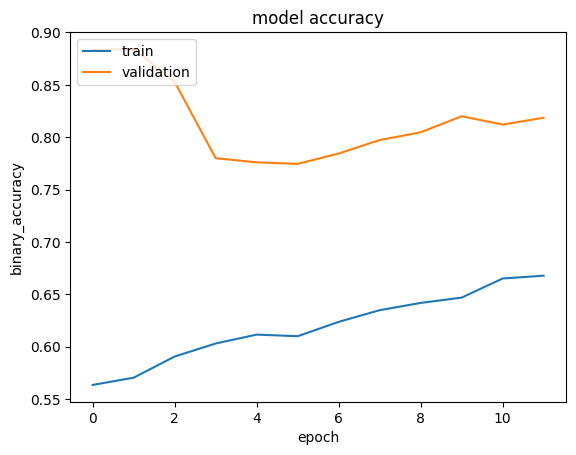

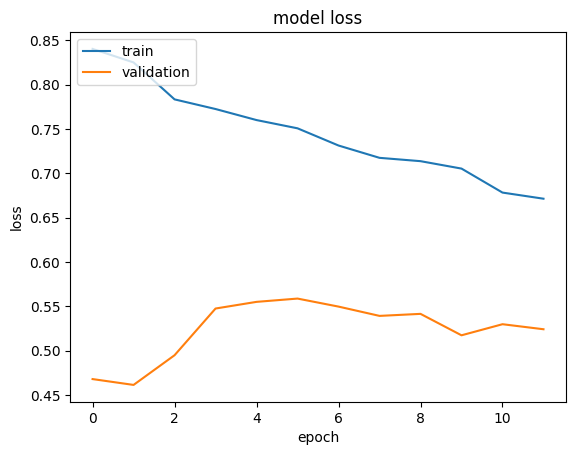

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
prediction = model.predict(X_test)
# show the inputs and predicted outputs
#for i in range(len(X_test)):
print("X=%s, Predicted=%s" % (X_test[0], prediction[0]))

32/32 [==============================] - 0s 3ms/step
X=[ 7.6776603e-03 -5.6070319e-05  5.1627061e-03 ...  2.7471829e-02
  3.7410200e-02  2.1080157e-02], Predicted=[0.6053082]


In [ ]:
for i in range(len(prediction)):
    if (prediction[i] < 0.5):
        prediction[i] = 0
    else:
        prediction[i] = 1

In [ ]:
matrix = confusion_matrix(y_test, prediction)
print(matrix)
#The diagonal entries are the accuracies of each class
matrix.diagonal()/matrix.sum(axis=1)

[[737 157]
 [ 37  80]]


array([0.82438479, 0.68376068])

In [ ]:
# from mlxtend.evaluate import accuracy_score

# std_acc = accuracy_score(y_test, prediction)
# bin_acc = accuracy_score(y_test, prediction, method='binary', pos_label=1)
# avg_acc = accuracy_score(y_test, prediction, method='average')

# print(f'Standard accuracy: {std_acc*100:.2f}%')
# # print(f'Class 1 accuracy: {bin_acc*100:.2f}%')
# print(f'Average per-class accuracy: {avg_acc*100:.2f}%')

In [ ]:
# # Evaluate the model on the test data using `evaluate`
# print("Evaluate on test data")
# results = model.evaluate(X_test, y_test, batch_size=128)
# print("test loss, test acc:", results)

THE BALANCED MODEL

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall

# lb = LabelBinarizer()

train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train_test split: test 30%
X_train, X_test, y_train, y_test = train_test_split(df_balanced['full_text'], df_balanced['Related'], test_size=0.20, random_state=0)

#test is 10% of the initial dataset, val 20%
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(2038,)
(340,)
(170,)


In [ ]:
print('Training text lenght: ', len(X_train))
print('Validation text: ', len(X_val))
print('Testing text: ',len(X_test))

Training text lenght:  2038
Validation text:  340
Testing text:  170


In [ ]:
X_train =laser_encode(X_train)
X_val = laser_encode(X_val)
X_test = laser_encode(X_test)

In [ ]:
print('X_train.shape', X_train.shape)
print('Y_train.shape', y_train.shape)

X_train.shape (2038, 1024)
Y_train.shape (2038,)


In [ ]:
X_train

array([[ 2.5191175e-02,  2.5347533e-04, -5.7054874e-03, ...,
         1.8248456e-02,  4.5851875e-02,  8.9509236e-03],
       [ 3.6520646e-03,  7.2270497e-03,  8.0224928e-03, ...,
         2.6949650e-02,  2.3244312e-02,  2.1973569e-02],
       [ 1.0778668e-02,  2.1342320e-02,  1.9247890e-02, ...,
         1.4483048e-02,  6.4615700e-03,  2.6524367e-02],
       ...,
       [ 1.0110676e-02,  2.6295465e-05, -6.9199939e-04, ...,
         1.3634519e-02,  2.6676485e-02,  1.1702177e-02],
       [ 2.5072359e-02,  2.1075323e-02, -1.6690526e-03, ...,
         2.4674200e-02,  1.5064173e-02,  1.4766825e-02],
       [ 1.4804495e-03, -1.8064973e-05, -5.3430451e-03, ...,
         1.7388957e-02,  3.1532798e-02,  4.0690426e-02]], dtype=float32)

In [ ]:
y_train

113      1
7632     1
5432     0
2674     1
8614     0
        ..
6025     0
7753     1
6912     0
10043    0
1524     1
Name: Related, Length: 2038, dtype: int64

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2038, 1024)
(340, 1024)
(170, 1024)


In [ ]:
max_len = 1024


> Neural Network - TF Keras

This inputs a 1024 LASER embedding and outputs a 1 bit classification prediction.

A triangular shaped architecture is used, including Dropout and BatchNorm.

2022/07/06 Updated LASER models with support for over 200 languages

In [ ]:
pip install tensorflow-addons

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa


In [ ]:
# Build the model

accuracy_metric = tf.keras.metrics.BinaryAccuracy()
precision_metric = Precision()
recall_metric = Recall()
f1_score_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1024,)),
    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics =  [ accuracy_metric, precision_metric, recall_metric, f1_score_metric ])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_20 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_21 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 128)              

In [ ]:
epochs = 1000
batch_size = 32

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=7)


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    verbose=1,
                    validation_data=([X_val, y_val]),
                    callbacks=callback)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


64/64 [==============================] - 5s 21ms/step - loss: 0.8432 - binary_accuracy: 0.5383 - precision_5: 0.5320 - recall_5: 0.5610 - f1_score: 0.5461 - val_loss: 0.6995 - val_binary_accuracy: 0.4882 - val_precision_5: 0.4882 - val_recall_5: 1.0000 - val_f1_score: 0.6561
Epoch 2/1000
64/64 [==============================] - 1s 13ms/step - loss: 0.8099 - binary_accuracy: 0.5491 - precision_5: 0.5424 - recall_5: 0.5709 - f1_score: 0.5563 - val_loss: 0.6986 - val_binary_accuracy: 0.4882 - val_precision_5: 0.4882 - val_recall_5: 1.0000 - val_f1_score: 0.6561
Epoch 3/1000
64/64 [==============================] - 1s 14ms/step - loss: 0.8016 - binary_accuracy: 0.5579 - precision_5: 0.5502 - recall_5: 0.5867 - f1_score: 0.5679 - val_loss: 0.6842 - val_binary_accuracy: 0.5206 - val_precision_5: 0.5046 - val_recall_5: 0.9819 - val_f1_score: 0.6667
Epoch 4/1000
64/64 [==============================] - 1s 15ms/step - loss: 0.7533 - binary_accuracy: 0.5908 - precision_5: 0.5808 - recall_5: 0.62

In [ ]:
model.evaluate(X_test, y_test, verbose =1)


6/6 [==============================] - 0s 6ms/step - loss: 0.3448 - binary_accuracy: 0.8706 - precision_5: 0.8532 - recall_5: 0.9394 - f1_score: 0.8942


[0.3448081612586975,
 0.8705882430076599,
 0.853210985660553,
 0.939393937587738,
 array([0.8942307], dtype=float32)]

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'binary_accuracy', 'precision_5', 'recall_5', 'f1_score', 'val_loss', 'val_binary_accuracy', 'val_precision_5', 'val_recall_5', 'val_f1_score'])


In [ ]:
    print('Train Accuracy')
    model.evaluate(X_train, y_train)

    print('Test Accuracy')
    model.evaluate(X_test, y_test)

Train Accuracy
64/64 [==============================] - 0s 4ms/step - loss: 0.2118 - binary_accuracy: 0.9485 - precision_5: 0.9170 - recall_5: 0.9851 - f1_score: 0.9498
Test Accuracy
6/6 [==============================] - 0s 6ms/step - loss: 0.3448 - binary_accuracy: 0.8706 - precision_5: 0.8532 - recall_5: 0.9394 - f1_score: 0.8942


[0.3448081612586975,
 0.8705882430076599,
 0.853210985660553,
 0.939393937587738,
 array([0.8942307], dtype=float32)]

In [ ]:
history.history['binary_accuracy']

[0.5382727980613708,
 0.5490677356719971,
 0.5578998923301697,
 0.5907752513885498,
 0.6064769625663757,
 0.5981354117393494,
 0.6236506104469299,
 0.6285573840141296,
 0.637880265712738,
 0.6447497606277466,
 0.6422963738441467,
 0.6457310914993286,
 0.671737015247345,
 0.6781157851219177,
 0.6835132241249084,
 0.688910722732544,
 0.7026496529579163,
 0.7109911441802979,
 0.7163886427879333,
 0.707556426525116,
 0.7193326950073242,
 0.7232580780982971,
 0.7046123743057251,
 0.7369970679283142,
 0.7208046913146973,
 0.743375837802887,
 0.7212954163551331,
 0.7350343465805054,
 0.757114827632904,
 0.7448478937149048,
 0.7365064024925232,
 0.7463199496269226,
 0.7502453327178955,
 0.7482826113700867,
 0.761040210723877,
 0.7644749879837036,
 0.7649656534194946,
 0.7826300263404846,
 0.7723258137702942,
 0.7733071446418762,
 0.7909715175628662,
 0.7880274653434753,
 0.7757605314254761,
 0.7811579704284668,
 0.7894995212554932,
 0.773797869682312,
 0.7821393609046936,
 0.7978410124778748,


In [ ]:
model.save('/content/gdrive/MyDrive/Models/Max_BalancedRelevanceModel_laser2.h5')


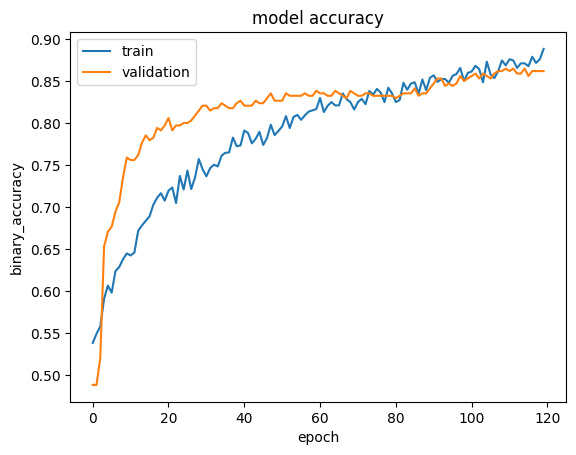

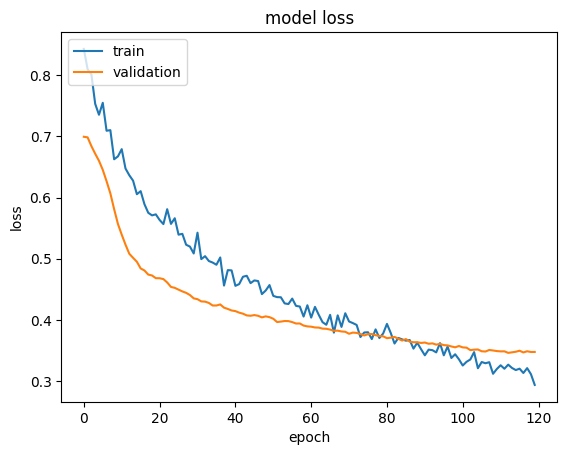

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
prediction = model.predict(X_test)
# show the inputs and predicted outputs
#for i in range(len(X_test)):
print("X=%s, Predicted=%s" % (X_test[0], prediction[0]))

6/6 [==============================] - 0s 4ms/step
X=[0.01219914 0.00632804 0.01387594 ... 0.01381474 0.01305203 0.03020814], Predicted=[0.07516633]


In [ ]:
for i in range(len(prediction)):
    if (prediction[i] < 0.5):
        prediction[i] = 0
    else:
        prediction[i] = 1

In [ ]:
matrix = confusion_matrix(y_test, prediction)
print(matrix)
#The diagonal entries are the accuracies of each class
matrix.diagonal()/matrix.sum(axis=1)

[[55 16]
 [ 6 93]]


array([0.77464789, 0.93939394])